In [1]:
!pip install pandas numpy scikit-learn nltk textblob

In [2]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
#Load dataset
df = pd.read_csv('tweets.csv')
# Replace with your file name
df.head()

,author,content,country,date_time,id,language,latitude,longitude,number_of_likes,number_of_shares
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,NaN,12/01/2017 19:52,8.196330e+17,en,NaN,NaN,7900,3472
1,katyperry,@barackobama Thank you for your incredible gra...,NaN,11/01/2017 08:38,8.191010e+17,en,NaN,NaN,3689,1380
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,NaN,11/01/2017 02:52,8.190140e+17,en,NaN,NaN,10341,2387
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,NaN,11/01/2017 02:44,8.190120e+17,en,NaN,NaN,10774,2458
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,NaN,10/01/2017 05:22,8.186890e+17,en,NaN,NaN,17620,4655


In [16]:
# Function to clean text
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # remove URLs
    text = re.sub(r'@\w+', '', text)     # remove mentions
    text = re.sub(r'#\w+', '', text)     # remove hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # remove punctuation/numbers
    text = text.lower()                  # lowercase
    return text

# Display columns to find the correct text column
print(df.columns)

# Apply cleaning
df['clean_text'] = df['content'].apply(clean_text)

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
df.head()

Index(['author', 'content', 'country', 'date_time', 'id', 'language',
       'latitude', 'longitude', 'number_of_likes', 'number_of_shares'],
      dtype='object')


,author,content,country,date_time,id,language,latitude,longitude,number_of_likes,number_of_shares,clean_text
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,NaN,12/01/2017 19:52,8.196330e+17,en,NaN,NaN,7900,3472,history repeating
1,katyperry,@barackobama Thank you for your incredible gra...,NaN,11/01/2017 08:38,8.191010e+17,en,NaN,NaN,3689,1380,thank incredible grace leadership exceptional
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,NaN,11/01/2017 02:52,8.190140e+17,en,NaN,NaN,10341,2387,life goals
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,NaN,11/01/2017 02:44,8.190120e+17,en,NaN,NaN,10774,2458,right
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,NaN,10/01/2017 05:22,8.186890e+17,en,NaN,NaN,17620,4655,sisters doin


In [20]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['sentiment']  # Column with labels: positive, negative, neutral

# Display columns to find the correct sentiment column
print(df.columns)

Index(['author', 'content', 'country', 'date_time', 'id', 'language',
       'latitude', 'longitude', 'number_of_likes', 'number_of_shares',
       'clean_text', 'polarity', 'subjectivity', 'sentiment'],
      dtype='object')


In [18]:
# Function to get sentiment polarity and subjectivity using TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply sentiment analysis to clean_text
df['polarity'], df['subjectivity'] = zip(*df['clean_text'].apply(get_sentiment))

# Function to classify sentiment based on polarity
def classify_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment classification
df['sentiment'] = df['polarity'].apply(classify_sentiment)

display(df[['clean_text', 'polarity', 'subjectivity', 'sentiment']].head())

,clean_text,polarity,subjectivity,sentiment
0,history repeating,0.000000,0.000000,neutral
1,thank incredible grace leadership exceptional,0.783333,0.950000,positive
2,life goals,0.000000,0.000000,neutral
3,right,0.285714,0.535714,positive
4,sisters doin,0.000000,0.000000,neutral


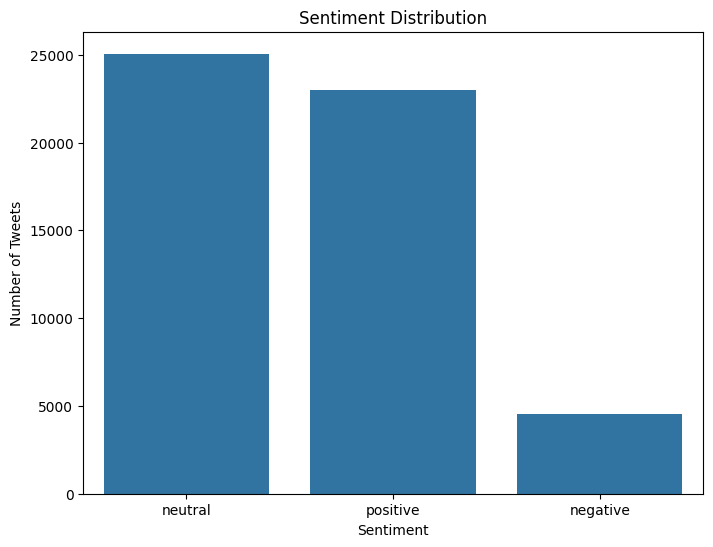

In [24]:
# Plot sentiment distribution
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()